<a href="https://colab.research.google.com/github/Serbeld/Dataset-4C-D/blob/master/ColorData_4C_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset 4C-D**

The Dataset_4C_D_RGB.hdf5 file consists in 3099 images in RGB scale (Information is only on one channel to avoid overtraining), divided in 4 classes. There are 2169 training images, 465 validation images and 465 test images. (70% for training, 15% for validation and 15% for testing)

The images are getting from:

    Kermany, Daniel & Goldbaum, Michael & Cai, Wenjia & Valentim, Carolina & Liang, Hui-Ying & Baxter, Sally & McKeown, Alex & Yang, Ge & Wu, Xiaokang & Yan, Fangbing & Dong, Justin & Prasadha, Made & Pei, Jacqueline & Ting, Magdalena & Zhu, Jie & Li, Christina & Hewett, Sierra & Dong, Jason & Ziyar, Ian & Zhang, Kang. (2018). 
    Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning. 
    Cell. 172. 1122-1131.e9. 10.1016/j.cell.2018.02.010. 
    https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia 
    
    Joseph Paul Cohen and Paul Morrison and Lan Dao
    COVID-19 image data collection, arXiv:2003.11597, 2020
    https://github.com/ieee8023/covid-chestxray-dataset

hdf5 file created by:

    Author: Sergio Luis Beleño Díaz
    Date: 2020-04-04

The classes are:

    Normal: 1000
    Pneumonia Vir: 1000
    Pneumonia Bact: 1000
    COVID-19: 99

Labels:

    Normal ==> 0
    Pneumonia Vir ==> 1
    Pneumonia Bact ==> 2
    COVID-19 ==> 3

Size:

    (512,512,3)

In [0]:
#Loading the dataset
!pip install h5py
import h5py

from google.colab import drive,files
drive.mount('/content/drive')

hdf5_path = '/content/drive/My Drive/Dataset COVID-19/Desv/Dataset_4C_D_RGB.hdf5'

dataset = h5py.File(hdf5_path, "r")

#Exploratory Data Analysis

In [0]:
import numpy as np
import matplotlib.pylab as plt

#train
train_img = dataset["train_img"]

xt = np.array(train_img)
yt = np.array(dataset["train_labels"])

#test
xtest = np.array(dataset["test_img"])
ytest = np.array(dataset["test_labels"])

#Validation
xval = np.array(dataset["val_img"])
yval = np.array(dataset["val_labels"])

In [0]:
print("Training Shape: "+ str(xt.shape))
print("Validation Shape: "+ str(xval.shape))
print("Testing Shape: "+ str(xtest.shape))

Training Shape: (2169, 512, 512, 3)
Validation Shape: (465, 512, 512, 3)
Testing Shape: (465, 512, 512, 3)


In [0]:
#Categorical values or OneHot
import keras

num_classes = 4 

yt = keras.utils.to_categorical(yt,num_classes)
ytest = keras.utils.to_categorical(ytest,num_classes)
yval = keras.utils.to_categorical(yval,num_classes)

print()
print('Normal:              0                    [1 0 0 0]')
print('Pneumonia Vir:       1                    [0 1 0 0]')
print('Pneumonia Bact:      2                    [0 0 1 0]')
print('COVID-19:            3                    [0 0 0 1]')

Using TensorFlow backend.



Normal:              0                    [1 0 0 0]
Pneumonia Vir:       1                    [0 1 0 0]
Pneumonia Bact:      2                    [0 0 1 0]
COVID-19:            3                    [0 0 0 1]



Output:                        [0. 1. 0. 0.]


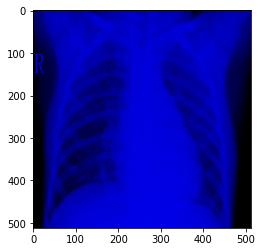

In [0]:
#Image
num_image = 60

print()
print("Output:                        "+ str(yt[num_image]))

imagen =  train_img[num_image]
plt.imshow(imagen)
plt.show()